In [12]:
# Time Independent Schrodinger Equation
# Computational Physics Project 2

import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [31]:
L = 2 # length
nx = 100 # number of grid points

x = np.linspace(0,L,nx) # grid
psi0 = 0; u0 = 1; # define initial conditions
init = np.array([psi0,u0])
E = 1

# potential function
def V(x):
    if x==0:
        return 1000
    else:
        return x
    
# psi update function
def f(psi,u,x,E):
    return u

# u update function
def g(psi,u,x,E):
    return 2*(V(x)-E)*psi

In [37]:
def deriv(sol,x,E):
    psi,u = sol
    
    dpsi = f(psi,u,x,E)
    du = g(psi,u,x,E)
    
    return np.array([dpsi,du])

def odeSolve(init,x,E):
    
    sol = odeint(deriv,init,x,args=(E,))
    
    return sol

sol = odeSolve(init,x,E)
psi = sol[:,0]; u = sol[:,1]

In [40]:
def rootHelper(init,x,E):
    sol = odeint(deriv,init,x,args=(E,))
    
    return sol[-1,0]

EMax = 10; nE = 100;
energies = np.linspace(0,EMax,nE)
psiE = np.zeros(nE)

for i in range(nE):
    psiE[i] = rootHelper(init,x,energies[i])
    

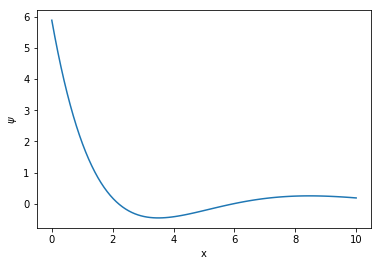

In [41]:
plt.plot(energies,psiE)
plt.xlabel("x"); plt.ylabel(r"$\psi$")
plt.show()